### Libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

### Reading & preprocessing data

In [45]:
df = pd.read_csv("df_cleaned.csv")
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2.705294,2.705294,2.706406,0,-0.800165,3.010788,1,6,1,2,...,1.691136,-0.42679,-0.151487,-0.413588,0.596422,0.408736,0.616524,0,1,0
1,2.831965,2.831965,2.833102,1,0.936464,2.194618,3,17,1,3,...,-0.559035,-0.42679,-0.151487,0.089148,2.015826,0.481396,2.387143,0,0,0
2,-0.461473,-0.461473,-0.461004,0,-1.252451,-0.430270,0,2,4,3,...,-1.121577,-0.42679,-0.151487,-0.929017,-1.011710,-0.238594,-0.922073,0,0,0
3,2.071941,2.071941,2.072924,0,0.064333,2.605715,2,13,1,1,...,-0.066810,-0.42679,-0.151487,0.193963,-0.319778,0.791850,-0.686441,0,0,0
4,-0.461473,-0.461473,-0.461004,1,0.547154,-0.695067,3,15,1,3,...,0.754502,-0.42679,-0.151487,-0.648830,-0.004733,-0.007405,0.040135,0,0,0


In [46]:
X = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=737)

### Decision Tree Model

In [52]:
def decision_tree_model(x_train, y_train, criterion="gini", max_depth=5, max_features=0.8,
                        max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=3,
                        min_weight_fraction_leaf=0):
  """
  Creates & trains a Decision Tree Classifier on given training data.

  Args:
  ----------
  x_train : array-like or pandas DataFrame
      Training input samples.
  y_train : array-like
      Target values (class labels) corresponding to x_train.
  criterion : str, default="gini"
      The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity
      and "entropy" for the information gain.
  max_depth : int, default=5
      The maximum depth of the tree. If None, nodes are expanded until all leaves are pure.
  max_features : int, float, or {"sqrt", "log2"}, default=0.8
      The number of features to consider when looking for the best split.
      If float, it represents a fraction of the total number of features.
  max_leaf_nodes : int, default=None
      Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.
      If None, then unlimited number of leaf nodes.
  min_samples_leaf : int, default=7
      The minimum number of samples required to be at a leaf node.
  min_samples_split : int, default=3
      The minimum number of samples required to split an internal node.
  min_weight_fraction_leaf : float, default=0
      The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

  Returns:
  -------
  dt : DecisionTreeClassifier
      The trained Decision Tree Classifier model.
  """
  dt = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth,
                                   max_features = max_features, max_leaf_nodes = max_leaf_nodes,
                                   min_samples_leaf = min_samples_leaf,
                                   min_samples_split = min_samples_split,
                                   min_weight_fraction_leaf = min_weight_fraction_leaf)
  dt.fit(x_train, y_train)
  return dt

In [53]:
dt = decision_tree_model(x_train, y_train)

In [54]:
y_pred_dt = dt.predict(x_test)

### Performance Measures

In [55]:
accuracy_score(y_test, y_pred_dt)

0.9629055243524185

In [56]:
f1_score(y_test, y_pred_dt)

0.9646720689792823

In [57]:
roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1])

np.float64(0.986574731265287)

### Interpretability

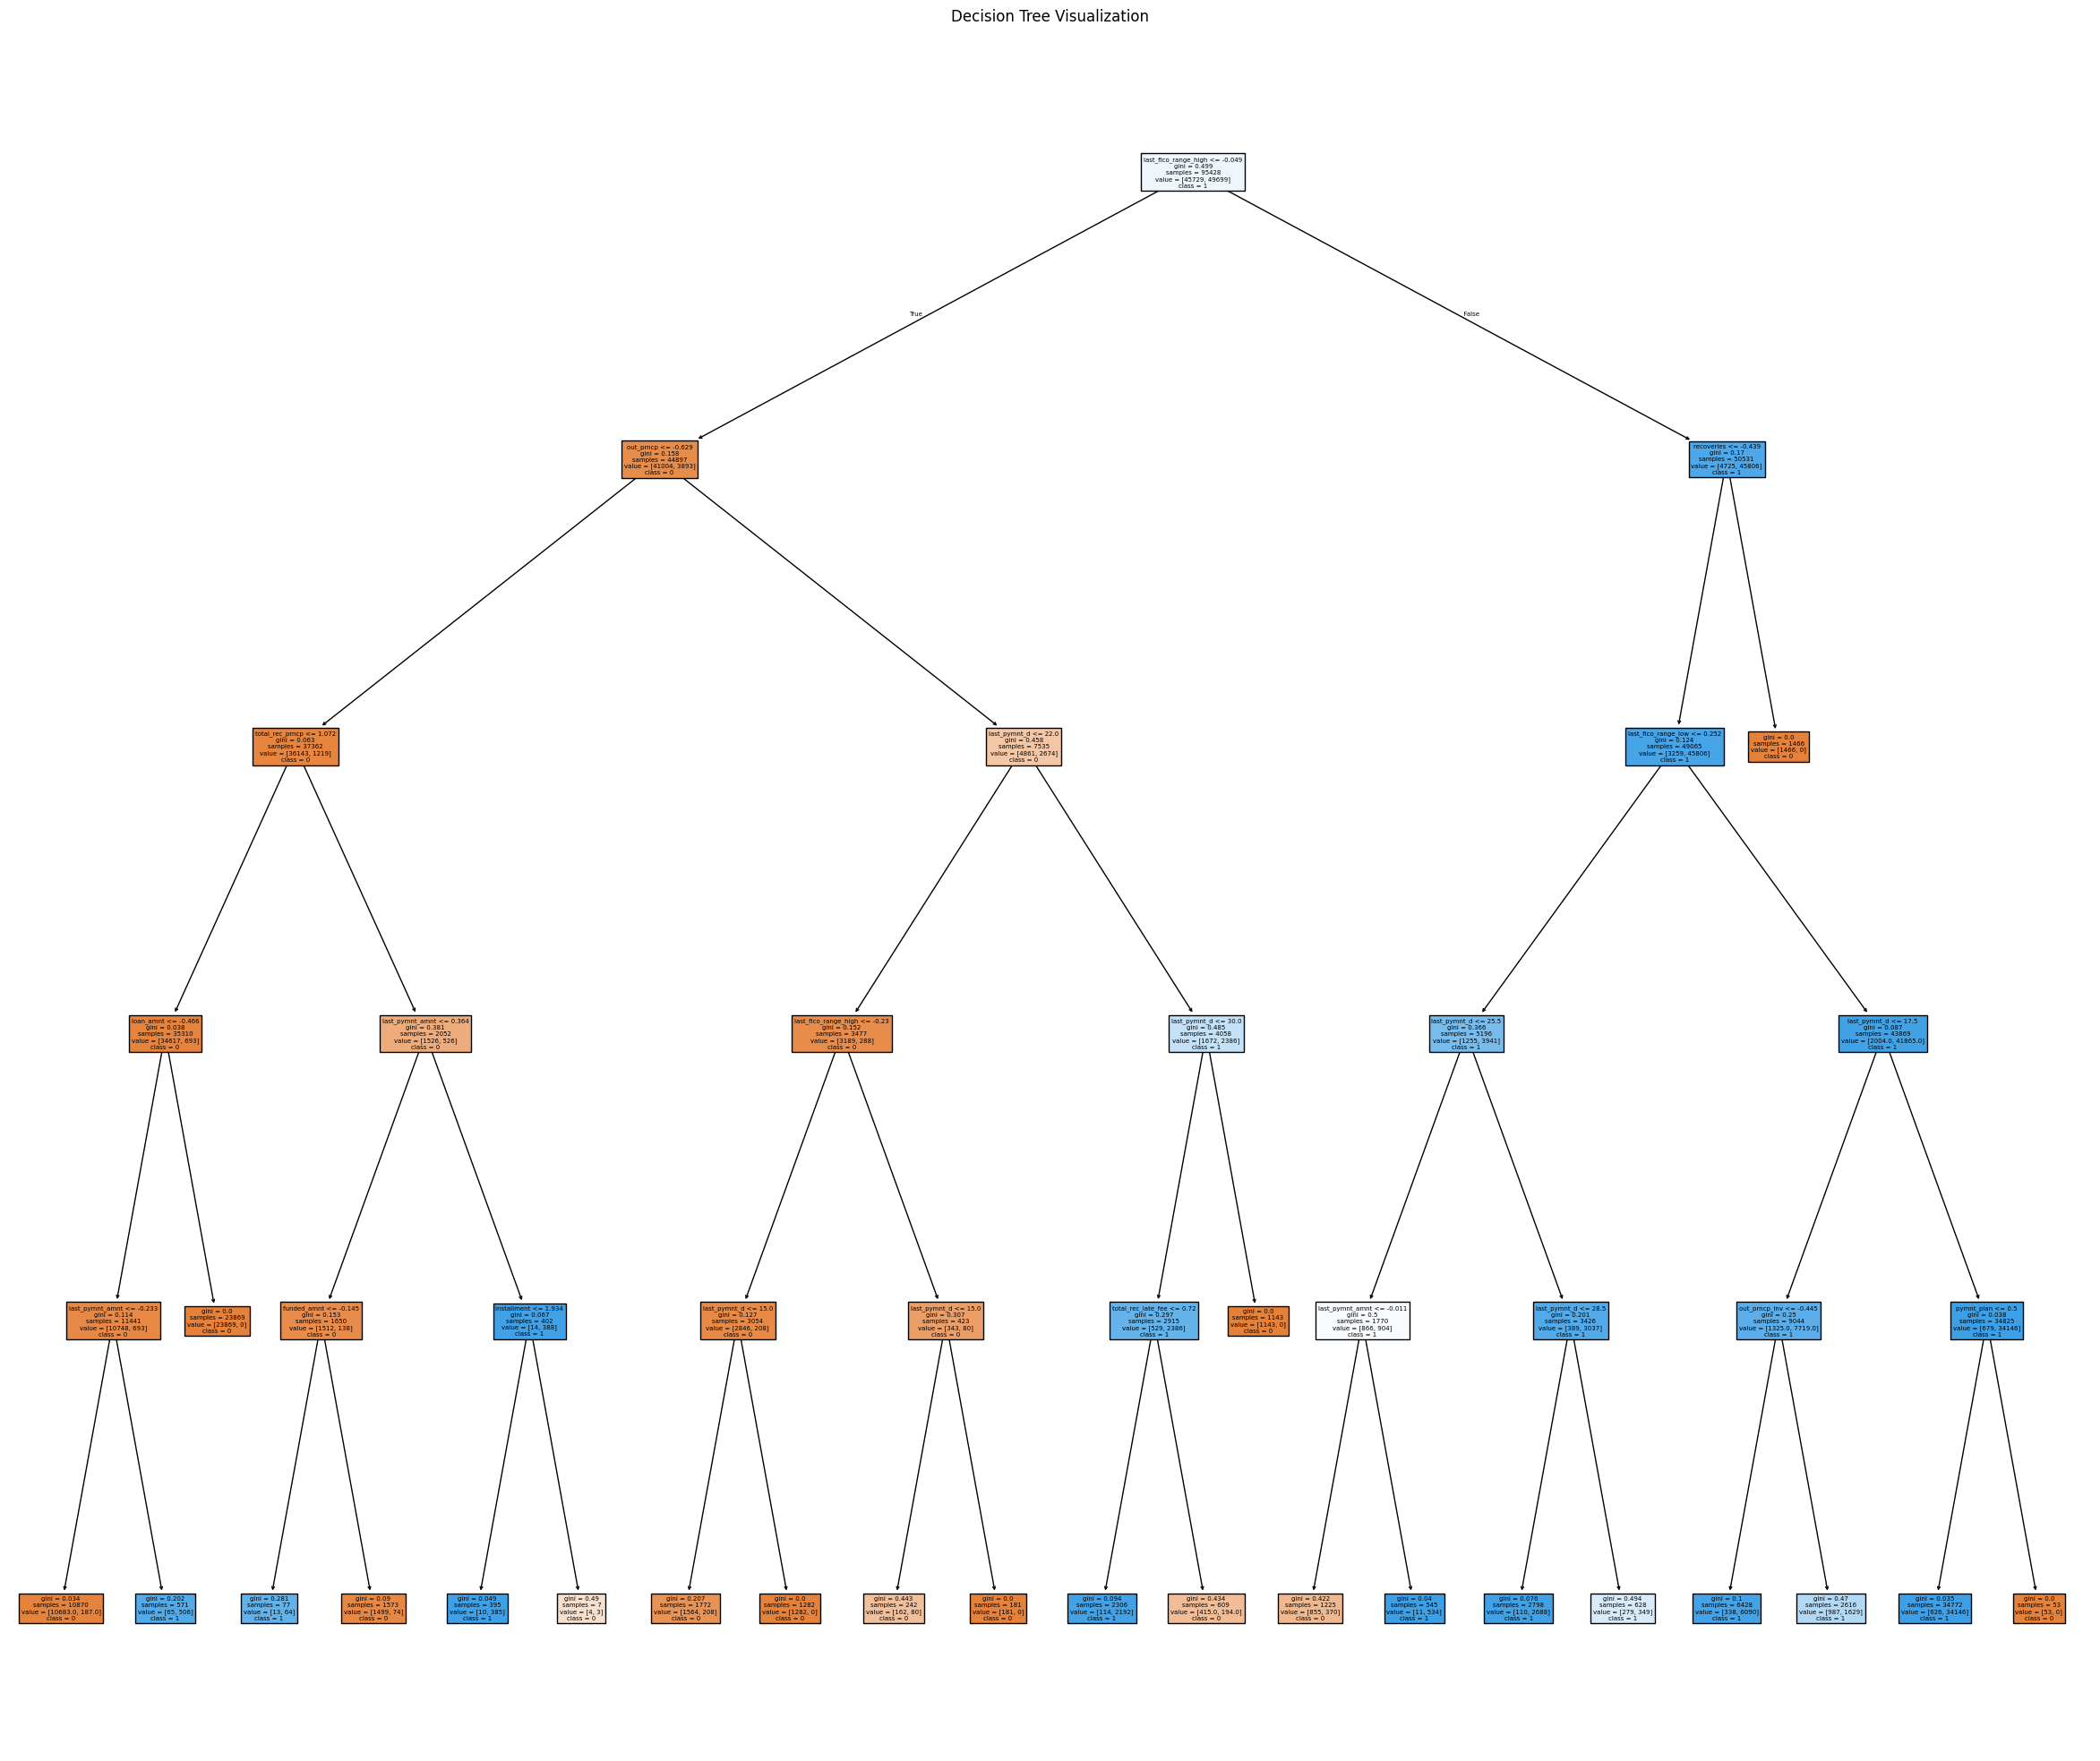

In [59]:
plt.figure(figsize=(30, 25))
plot_tree(dt, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.title('Decision Tree Visualization')
plt.show()